### 分别从图像 1 和图像 2 中抠出来两个5 × 5的图像块
分别计算

（1） 图像块 1 和图像块 2 的 SAD 误差；

（2） 图像块 1 和图像块 2 的 MSE 误差；

（3） 图像块 1 和图像块 2 的 NCC 误差

In [87]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d


img_1 = np.arange(25).reshape(5, 5) + 1
img_2 = np.arange(25).reshape(5, 5) + 11
print(img_1)
print()
print(img_2)


[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]

[[11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]
 [31 32 33 34 35]]


In [88]:
# SAD(Sum Of Absolutely Difference)
sad = np.sum(np.abs(np.subtract(img_1, img_2)))

# MSE(Mean Squared Error)
M, N = img_1.shape
mse = np.sum(np.power(np.subtract(img_1, img_2), 2)) / (M * N)

# NCC(Normalized Cross Correlation)
ncc = np.mean(np.multiply(img_1 - np.mean(img_1), img_2 - np.mean(img_2))) / (np.std(img_1) * np.std(img_2))

print("SAD: {:.3f}, MSE: {:.3f}, NCC: {:.3f}".format(sad,mse,ncc))

SAD: 250.000, MSE: 100.000, NCC: 1.000


### 给定一幅5 × 6的图像如下所示:

```
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
```
(1)计算 Ix，Iy

(2)利用如下的平滑模板

$w(m, n)=\left[\begin{array}{lll}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{array}\right]$

计算平滑后的lxx, lyy 和 lxy

(3) 计算每一点的 corner ness，使用k = 0.04

In [89]:

img_3 = np.zeros([5,6])
img_3[1:4,2:4]=1
dx = np.asarray([[1,0,-1]])
dy = np.asarray([[1],[0],[-1]])

lx = convolve2d(img_3,np.rot90(dx,2),'same')
ly = convolve2d(img_3,np.rot90(dy,2),'same')

lxx = np.multiply(lx,lx)
lyy = np.multiply(ly,ly)
lxy = np.multiply(lx,ly)
lxy[lxy==0]=0
print("lxx: \n{}\nlyy: \n{}\nlxy: \n{}\n".format(lxx,lyy,lxy))


lxx: 
[[0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]
lyy: 
[[0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]]
lxy: 
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]



lxx: 
[[1. 2. 3. 3. 2. 1.]
 [2. 4. 6. 6. 4. 2.]
 [3. 6. 9. 9. 6. 3.]
 [2. 4. 6. 6. 4. 2.]
 [1. 2. 3. 3. 2. 1.]]
lyy: 
[[0. 2. 4. 4. 2. 0.]
 [0. 2. 4. 4. 2. 0.]
 [0. 2. 4. 4. 2. 0.]
 [0. 2. 4. 4. 2. 0.]
 [0. 2. 4. 4. 2. 0.]]
lxy: 
[[ 0.  1.  0.  0. -1.  0.]
 [ 0.  1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  1.  0.]
 [ 0. -1.  0.  0.  1.  0.]]

corner_ness: 
[[-0.04  2.36 10.04 10.04  2.36 -0.04]
 [-0.16  5.56 20.   20.    5.56 -0.16]
 [-0.36  9.44 29.24 29.24  9.44 -0.36]
 [-0.16  5.56 20.   20.    5.56 -0.16]
 [-0.04  2.36 10.04 10.04  2.36 -0.04]]


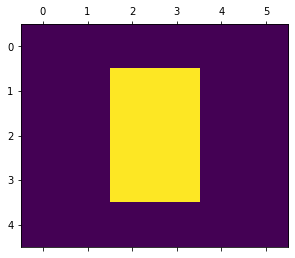

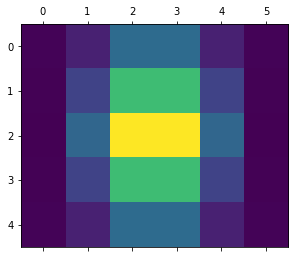

In [90]:
w = np.ones([3,3])
# 平滑
lxx = convolve2d(lxx,np.rot90(w,2),'same')
lyy = convolve2d(lyy,np.rot90(w,2),'same')
lxy = convolve2d(lxy,np.rot90(w,2),'same')

print("lxx: \n{}\nlyy: \n{}\nlxy: \n{}\n".format(lxx,lyy,lxy))

# 矩阵的特征值之和等于矩阵的迹，之积等于矩阵的行列式
m,n = lxx.shape
corner_ness = np.zeros([m,n])
lamb1 = np.zeros([m,n])
lamb2 = np.zeros([m,n])


k = 0.04
for i in range(m):
    for j in range(n):
        M = np.asarray([[lxx[i,j],lxy[i,j]],
                        [lxy[i,j],lyy[i,j]]])
        a,b = np.linalg.eig(M)[0]
        lamb1[i,j] = a
        lamb2[i,j] = b
        corner_ness[i,j] = np.linalg.det(M) - k*np.power(np.trace(M),2)
print("corner_ness: \n{}".format(corner_ness))

plt.matshow(img_3)
# plt.matshow(lamb1)
# plt.matshow(lamb2)
plt.matshow(corner_ness)
plt.show()